<a href="https://colab.research.google.com/github/JeremyKrick/Predictive-Analytics-for-Store-Performance/blob/main/FINAL_PROJECT_JUNE_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 6   

### `Jeremiah Krick`   `Isaack Karanja`



### Final Project : AAI-510-02-SU23 - Machine Learning - Fundamentals


# Introduction

This report looked at store and sales data for Rossmann drug stores. This data was provided by Rossmann a European drug retailer with over 3,000 stores in 7 countries, the data was anonimized and did not contain any PII data. (Knauer, 2015)

As part of the report, we conducted a data understanding phase. This involved exploring the relationships between the target sales variable and predictor variables using both graphical and non-graphical methods. We also cleaned the data, removed missing values, and addressed outliers.

The next phase was feature engineering. This involved transforming the data to make it more suitable for modeling. We then performed feature selection based on the data analysis.

The modeling phase involved selecting, comparing, tuning, and analyzing different models. We assessed the performance of the models using different performance measures such asRoot Mean Squared Error (RMSE) and Mean Absolute Error (MAE).

The discussion and conclusions section addressed the problem statement and provided recommendations

Citation: F Knauer, W Cukierski, Rossmann Store Sales, Kaggle, 2015

---

# Business understanding.

Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

The **primary goal** of this project was to build a machine learning model that would allow us to predict store daily sales with reasonable accuracy. 

A **secondary goal** of this project was to understand  what factors affected the Rossman's store's sales performance that would influence the strategic decisions could be made based on this information.


---

#  Data Review

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

## Import of data

We'll begin with importing the required libraries and reading our .csv files.

In [1]:
#@title Loading the required libraries
import numpy as np
import pandas as pd # Pandas for data manipulation
import seaborn as sns # Seaborn for visualizing. Note: we will also use one of the data sets
import matplotlib.pyplot as plt # Matplotlib for subplots
%matplotlib inline
import datetime as dt

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler # Import for feature standardization
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# #@title Mounting  Google Drive to Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# daily_sales = pd.read_csv("/content/drive/My Drive/AAI 510/Team 6/rossmann-store-sales/train.csv", low_memory=False)
# stores_table = pd.read_csv("/content/drive/My Drive/AAI 510/Team 6/rossmann-store-sales/store.csv")

Then read two the tables provided included as part of the `(Rossmann Store Sales, 2015)` dataset

In [4]:
stores_table = pd.read_csv('store.csv') #supplemental information about the stores

In [5]:
daily_sales = pd.read_csv('train.csv', low_memory=False) #historical data including Sales

## Data Review

The **sales_data** dataframe provides a comprehensive record of daily sales for each store. It features 9 columns and over a million rows, with each row documenting a store's daily sales details. The dataframe includes information such as the store ID, day of the week, date, sales figures, number of customers, whether the store was open or not, if there was a promotion, and whether it was a state or school holiday. This dataframe primarily contains numerical and date data with the **Date** column as an object type. Here, **StateHoliday** is also an object type indicating whether a state holiday was being observed. 'Open', 'Promo', and 'SchoolHoliday' are binary flags indicating whether the store was open, if a promotional event was running, and if it was a school holiday, respectively.

In [65]:
daily_sales.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [63]:
daily_sales.shape

(1017209, 9)

In [64]:
daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


The **stores_table** dataframe, which is supplemental information about the stores, comprises 10 columns and 1,115 rows. Every row stands for a unique store, recognized by a primary key **Store**, which is represented as a distinct integer. The dataframe offers static attributes about each store such as the type of store, assortment variety, distance to the nearest competitor, and when the competition opened their store. Furthermore, it provides information about whether the store participates in the Promo2 campaign and, if so, when it started and at what intervals. Most of the data is numerical or float type, but 'StoreType' and 'Assortment' are categorical variables flagged with letters to signify different types and levels of store assortment. Moreover, 'PromoInterval' lists abbreviated months when the store participates in consecutive promotions.

In [6]:
stores_table.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
stores_table.shape

(1115, 10)

In [8]:
stores_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


---

---

## Merging of `daily_sales` and `stores_table`

In order to combine the **stores_table** with the **daily_sales** table, we can use a merge operation, which is a function provided by pandas. Given that both tables share the 'Store' column (representing the unique identifier for each store), this column can serve as the common key for the join

In [12]:
def merge_data(daily_sales, stores_table):
    ## Function to merge the two tables on
    merged_data = pd.merge(daily_sales, stores_table, on='Store', how='left')
    return merged_data

In [13]:
combined_data =  merge_data(daily_sales, stores_table)
# Convert is named 'Date' column to date type
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

## Covert `SchoolHoliday` and `Open` binary to Category dtype
combined_data['SchoolHoliday'] = combined_data['SchoolHoliday'].astype('category')
combined_data['Open'] = combined_data['Open'].astype('category')

combined_data.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [14]:
#@title 10% subset of df
combined_data = combined_data.sample(frac=0.10, random_state=42)
combined_data.shape

(101721, 18)

---

# Exploratory Data Analysis

Below are the items that we conducted in the Exploratory data analysis
##### How clean is the data?
- Find features with overepresantation of one value of greater than 95%
- Find Missing Values

##### Explore the Categorical Features
- List the Categorical features
- Find Categorical Feature Distribution
- Relationship between Categorical Features and Label

##### Explore the Numerical Features
- Find Numerical Features
- Distribution of  Numerical Features
- Relation between  numerical Features and Labels
- Find Outliers in numerical features
- Explore the Correlation between numerical features
- Find Pair Plot

##### Explore Target variables
- Check the Data set is balanced or not based on target values in classification

---

## How clean is the data?

### Find features with overepresantation of one value of greater than 95% 

In [15]:
def check_overrepresentation(df):
    # Iterate over all columns in the dataframe
    for column in df.columns:
        # If the column is of object type (categorical), check for overrepresentation
        if df[column].dtype == 'object':
            # Calculate the percentages of different categories in the column
            percentage_distribution = df[column].value_counts(normalize=True) * 100
            # If any category is represented more than 90%, print column name and percentage
            overrepresented = percentage_distribution[percentage_distribution > 95]
            if not overrepresented.empty:
                print(f'Column "{column}" has overrepresentation:')
                for category, percent in overrepresented.items():
                    print(f'Category "{category}" is represented by {percent:.2f}%')

# Call the function DataFrame
check_overrepresentation(combined_data)

Column "StateHoliday" has overrepresentation:
Category "0" is represented by 96.93%


##### Result:
- `StateHoliday` has overrepresentation with 96.93% of days not being StateHolidays.

### Check for Missing values

In [16]:
missing_values = combined_data.isna().sum()
print(missing_values)

Store                            0
DayOfWeek                        0
Date                             0
Sales                            0
Customers                        0
Open                             0
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance            263
CompetitionOpenSinceMonth    32336
CompetitionOpenSinceYear     32336
Promo2                           0
Promo2SinceWeek              51105
Promo2SinceYear              51105
PromoInterval                51105
dtype: int64


##### Result:
- `['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval']` have null values

## Explore Categorical features

### List the Categorical features

In [17]:
def print_categorical_values(dataframe):
    categorical_cols = dataframe.select_dtypes(include=['object','category']).columns
    for col in categorical_cols:
        unique_values = dataframe[col].unique()
        print(f"Categorical Column: {col}")
        print(f"Unique Values: {unique_values}\n")

print_categorical_values(combined_data)

Categorical Column: Open
Unique Values: [0, 1]
Categories (2, int64): [0, 1]

Categorical Column: StateHoliday
Unique Values: ['0' 'a' 'b' 'c']

Categorical Column: SchoolHoliday
Unique Values: [0, 1]
Categories (2, int64): [0, 1]

Categorical Column: StoreType
Unique Values: ['a' 'd' 'c' 'b']

Categorical Column: Assortment
Unique Values: ['c' 'a' 'b']

Categorical Column: PromoInterval
Unique Values: ['Mar,Jun,Sept,Dec' nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov']



### Plot a categorical feature distribution

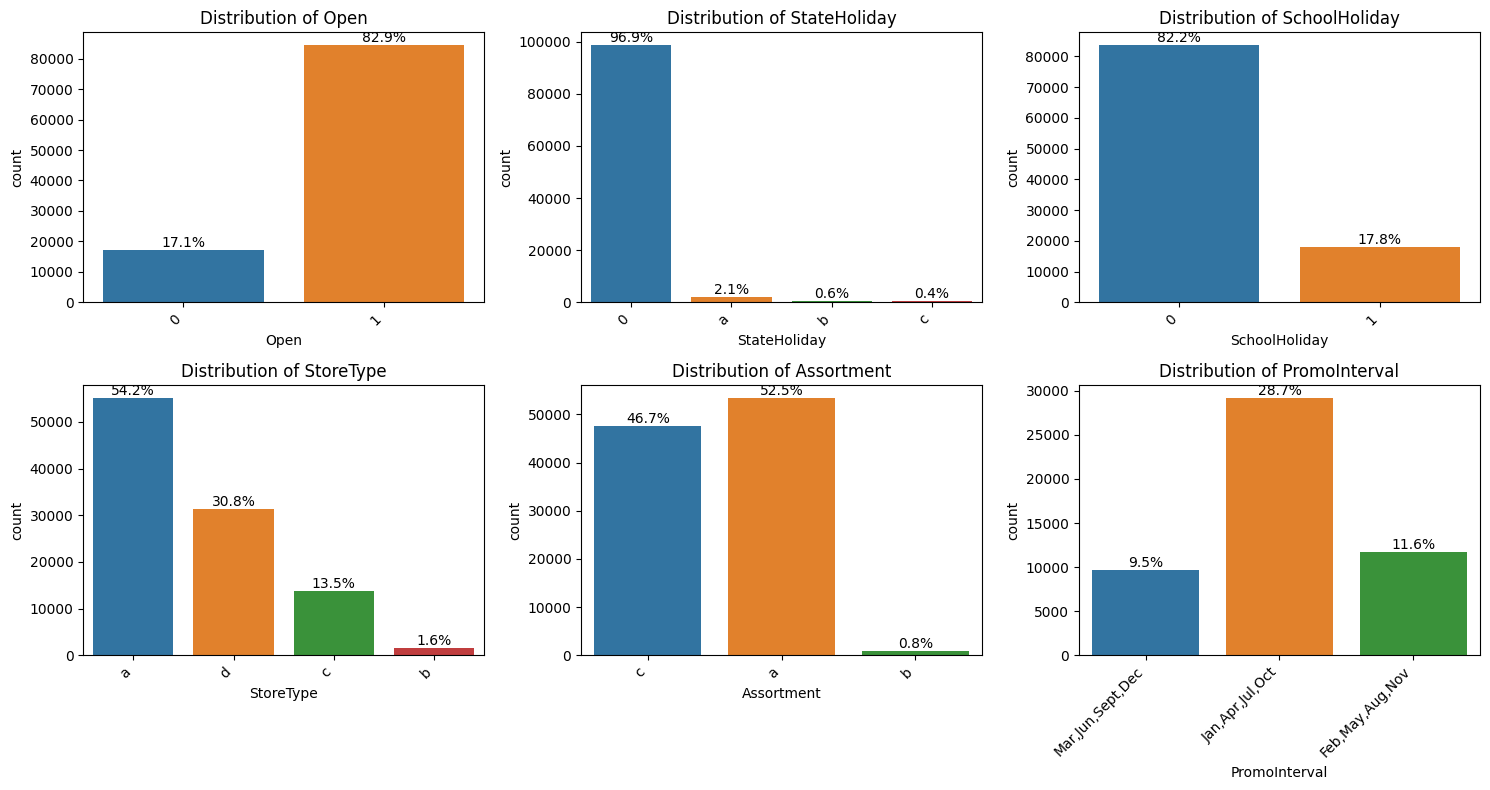

In [18]:
def plot_categorical_distribution(df):
    # Select categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category'])

    # Determine the number of rows and columns for the subplots grid
    n_cols = 3
    n_rows = int(np.ceil(len(categorical_columns.columns) / n_cols))
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 4 * n_rows))
    axes = axes.flatten()

    # Function to annotate bars with percentage values
    def annotate_bars(ax, column):
        total = len(column)
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom')

    # Plot the distribution of each categorical column
    for idx, column in enumerate(categorical_columns.columns):
        ax = axes[idx]
        sns.countplot(x=column, data=categorical_columns, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        annotate_bars(ax, categorical_columns[column])

    # Remove any unused subplots
    for idx in range(len(categorical_columns.columns), len(axes)):
        fig.delaxes(axes[idx])

    # Display the plot
    plt.tight_layout()
    plt.show()
plot_categorical_distribution(combined_data)

##### Result:
- The stores were open 82% of the time. 
- 96% of the distribution of sales occured on days where there were no stateholidays
- Store type `b` was underpresented in the data at 16% with there being more storetype `a` at 54%
- Assortments `a` and `c` had a even distribution but type `b` was not well respresented at 1.6%
- Most of the promotions ran in `Jan, Apr, Jul, Oct`

### Plot the relationship between Categorical Features and Label

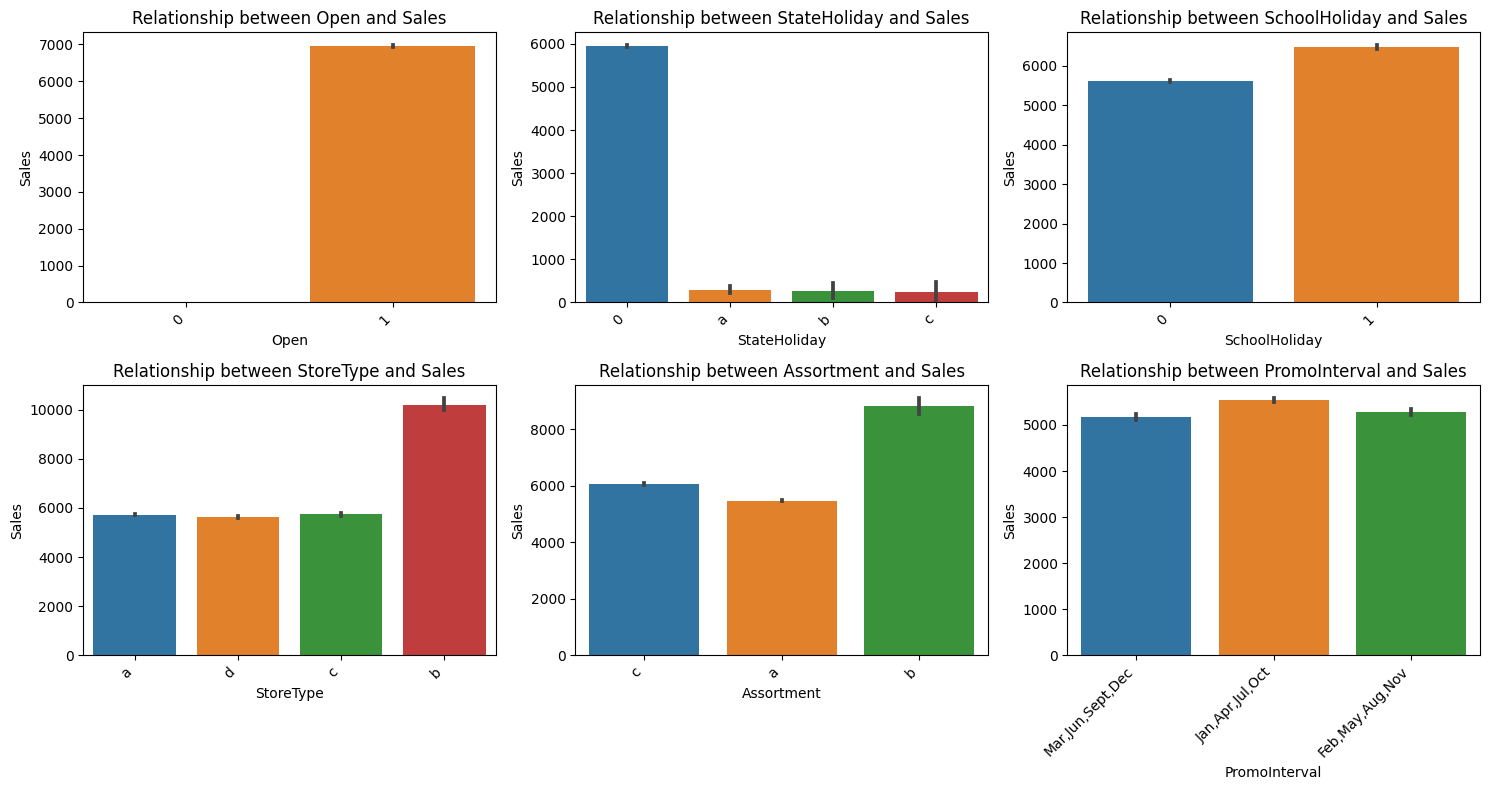

In [19]:
def plot_categorical_features(df, label):
    # Select categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category'])

    # Determine the number of rows and columns for the subplots grid
    n_cols = 3
    n_rows = int(np.ceil(len(categorical_columns.columns) / n_cols))
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 4 * n_rows))
    axes = axes.flatten()

    # Plot the relationship of each categorical column with the label
    for idx, column in enumerate(categorical_columns.columns):
        ax = axes[idx]
        sns.barplot(x=column, y=label, data=df, ax=ax)
        ax.set_title(f'Relationship between {column} and {label}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Remove any unused subplots
    for idx in range(len(categorical_columns.columns), len(axes)):
        fig.delaxes(axes[idx])

    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function with  DataFrame and label
plot_categorical_features(combined_data, 'Sales')

##### Result:

- As expected, the data shows that 100% sales occured when the stores were open. 
- Majority of the sales occured on the 96% of the distribution where there were no stateholidays. This could be due to closure due to public holidays
- Despite the fact that all stateHolidays are school holidays but not vice versa, schoolHoldays which represented only 17% of the data, they contributed to greater than 50% of sales.
- Although type `b` was underpresented in the data 2.8, it contributed to the majority of the sales
- Although assortment type `b` was not well respresented. It contributed to majority of the sales. 
- Although most of the  `Jan, Apr, Jul, Oct` each promoportion interval evenly contributed to the sales

## Explore the Numerical Variables

### Describe the numerical features

In [20]:
combined_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,101721.0,559.358127,321.495649,1.0,282.0,558.0,839.0,1115.0
DayOfWeek,101721.0,4.003598,1.997798,1.0,2.0,4.0,6.0,7.0
Sales,101721.0,5771.152879,3845.344769,0.0,3739.0,5752.0,7847.0,41551.0
Customers,101721.0,633.031842,465.518310,0.0,406.0,609.0,836.0,7388.0
Promo,101721.0,0.381583,0.485777,0.0,0.0,0.0,1.0,1.0
CompetitionDistance,101458.0,5466.068028,7745.482625,20.0,720.0,2330.0,6900.0,75860.0
CompetitionOpenSinceMonth,69385.0,7.196253,3.212381,1.0,4.0,7.0,10.0,12.0
CompetitionOpenSinceYear,69385.0,2008.736672,5.863185,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,101721.0,0.497596,0.499997,0.0,0.0,0.0,1.0,1.0
Promo2SinceWeek,50616.0,23.303343,14.097272,1.0,13.0,22.0,37.0,50.0


##### Result:
- There are 1115 stores with a  standard devitiation of 464 for customers and standard devitiaion of 3849 for daily sales

### Relation between Continous numerical Features and Labels

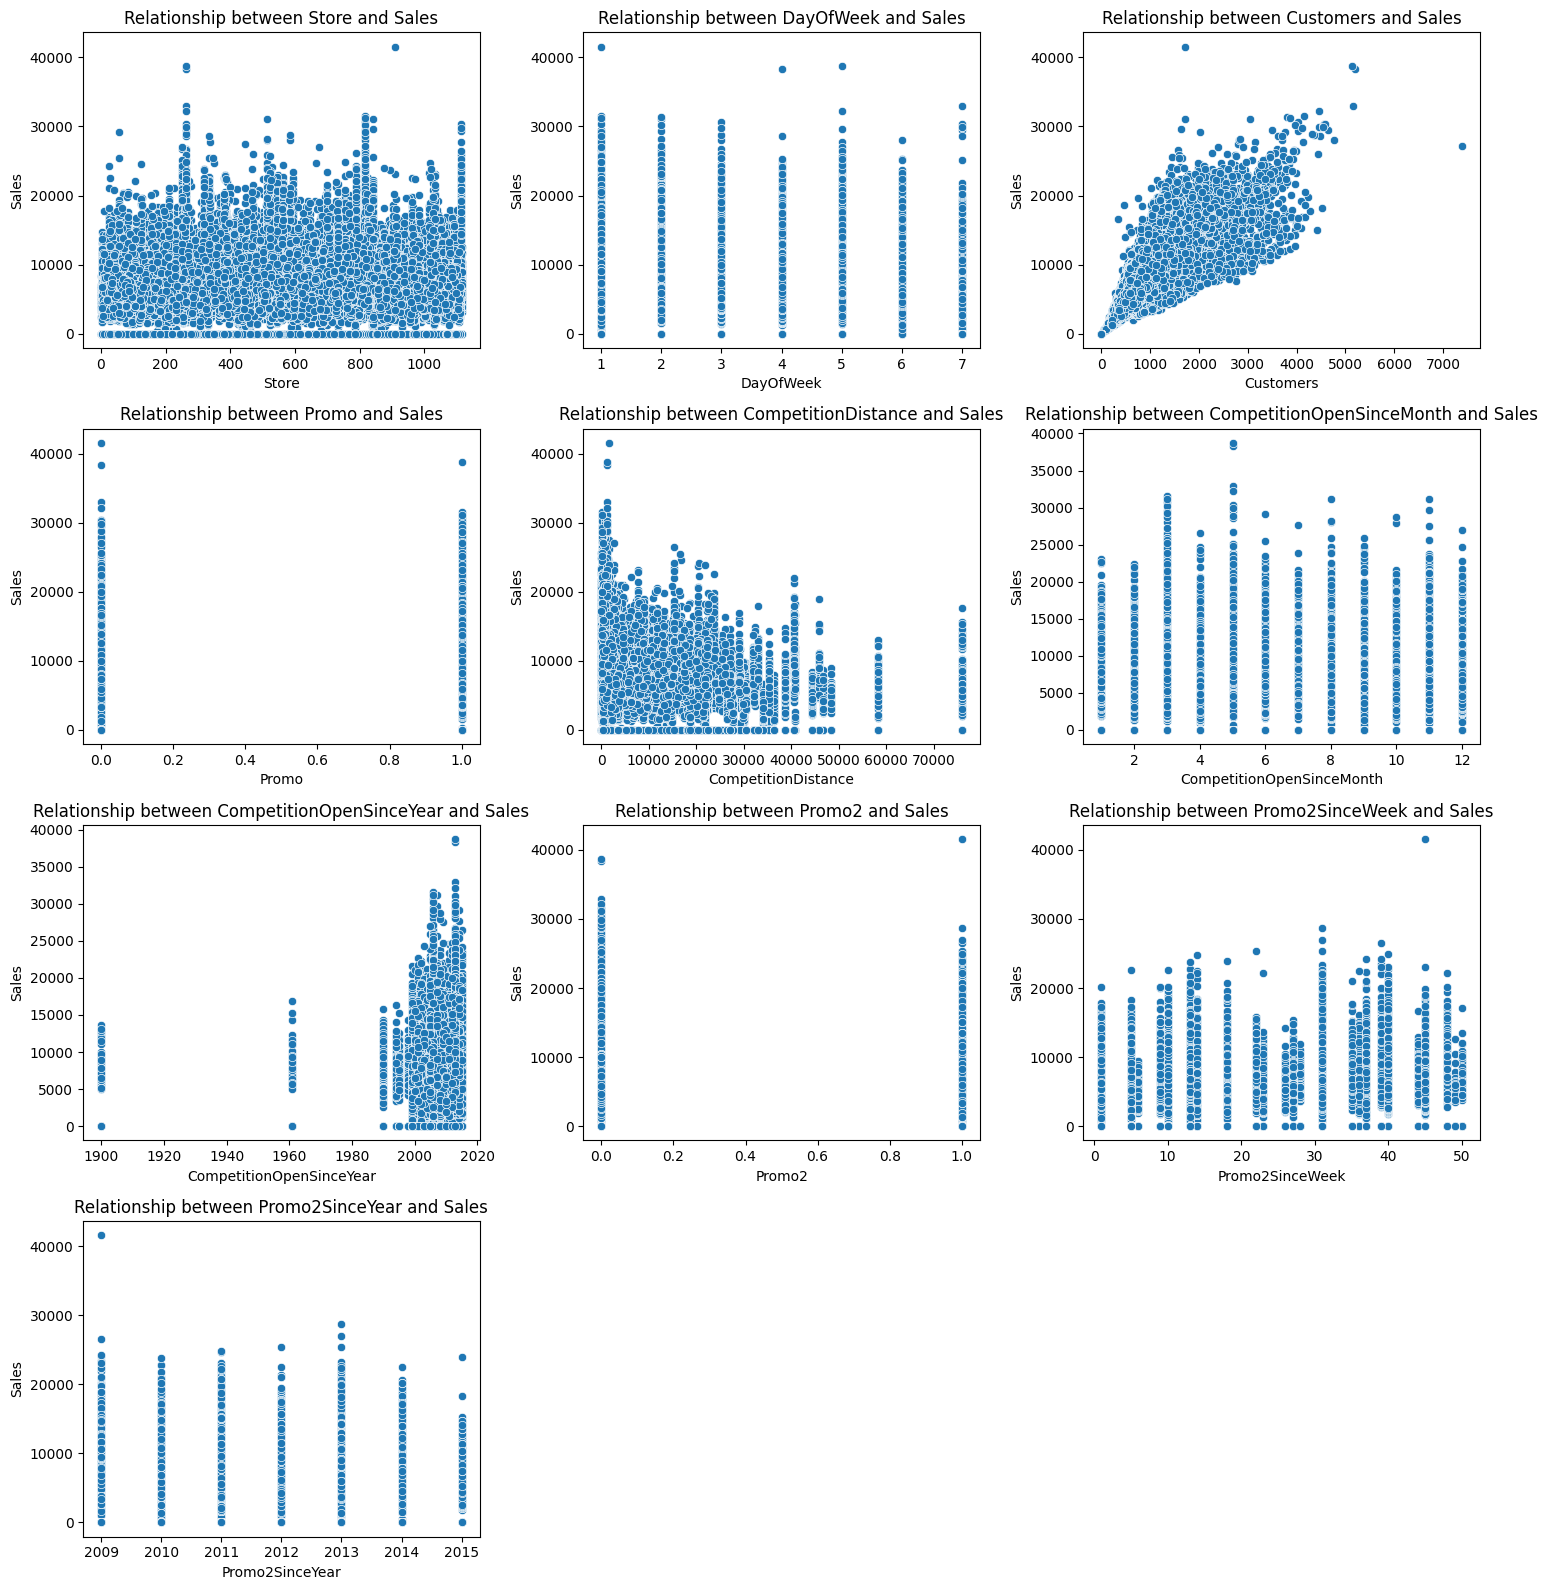

In [21]:
def plot_numerical_features(df, label):
    # Select numerical columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop([label], axis=1)

    # Determine the number of rows and columns for the subplots grid
    n_cols = 3
    n_rows = int(np.ceil(len(numerical_columns.columns) / n_cols))
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 4 * n_rows))
    axes = axes.flatten()

    # Plot the relationship of each numerical column with the label
    for idx, column in enumerate(numerical_columns.columns):
        ax = axes[idx]
        sns.scatterplot(x=column, y=label, data=df, ax=ax)
        ax.set_title(f'Relationship between {column} and {label}')

    # Remove any unused subplots
    for idx in range(len(numerical_columns.columns), len(axes)):
        fig.delaxes(axes[idx])

    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function with  DataFrame and label
plot_numerical_features(combined_data, 'Sales')

### Explore the relationship between DayOfWeek, DayOfMonth and MonthOfYear to sales

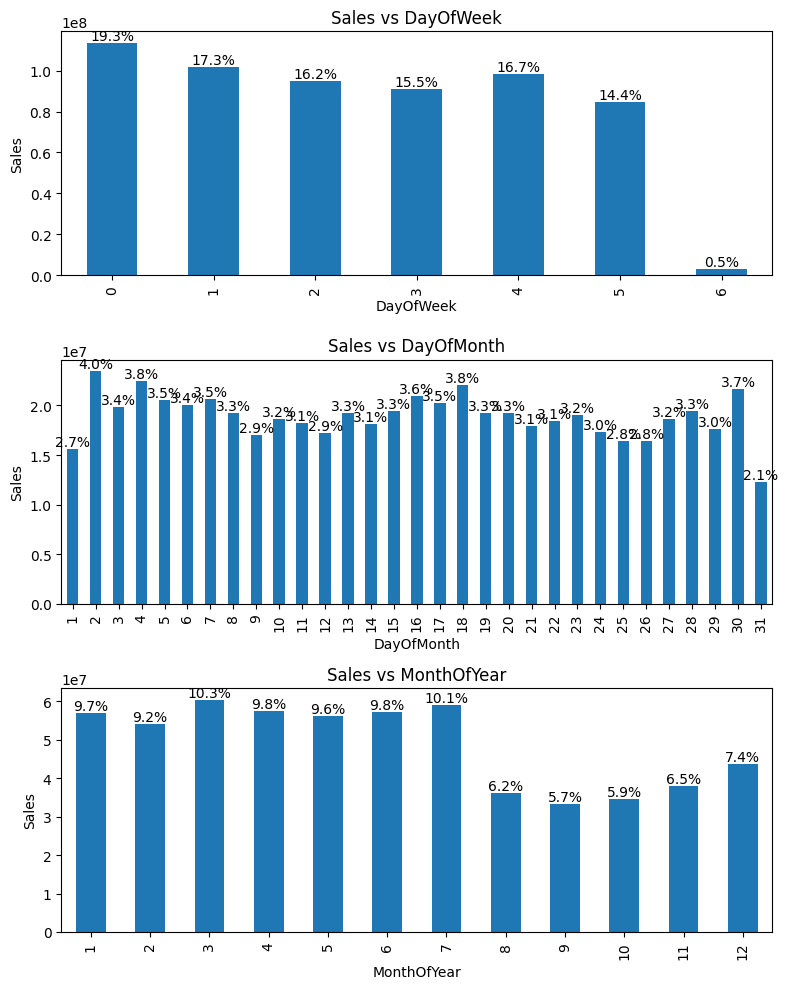

In [22]:
def plot_sales(dataframe, date_col='Date', sales_col='Sales'):
    # Ensure the date column is in datetime format
    dataframe[date_col] = pd.to_datetime(dataframe[date_col])

    # Extract day of week, day of month, month of year from the date column
    dataframe['DayOfWeek'] = dataframe[date_col].dt.dayofweek
    dataframe['DayOfMonth'] = dataframe[date_col].dt.day
    dataframe['MonthOfYear'] = dataframe[date_col].dt.month

    # Create subplots
    fig, axs = plt.subplots(3, figsize=(8, 10))

    # Create list for new columns
    new_cols = ['DayOfWeek', 'DayOfMonth', 'MonthOfYear']
    
    # Sales vs new_cols
    for i, new_col in enumerate(new_cols):
        grouped_values = dataframe.groupby(new_col)[sales_col].sum()
        total = grouped_values.sum()  # For percentage calculation
        
        grouped_values.plot(kind='bar', ax=axs[i])

        # Add percentage on top of each bar
        for p in axs[i].patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            axs[i].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='bottom')

        axs[i].set_title(f'Sales vs {new_col}')
        axs[i].set_xlabel(new_col)
        axs[i].set_ylabel('Sales')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function with  DataFrame
plot_sales(combined_data)

##### Result:
- Very few sales (.5%) sales occured on Sunday compared to other days of the week ( 14.4% - 19.3%).
- 1st and 31st had the lowest number of sales (2.7%) before spiking to 4% on the 2nd of the month. 
- Months 1-7, had the higest number of sales (10.1% - 9.2%), and sales decresed months 8-12 (7.4% - 5.7%)

### Find Outliers in numerical features

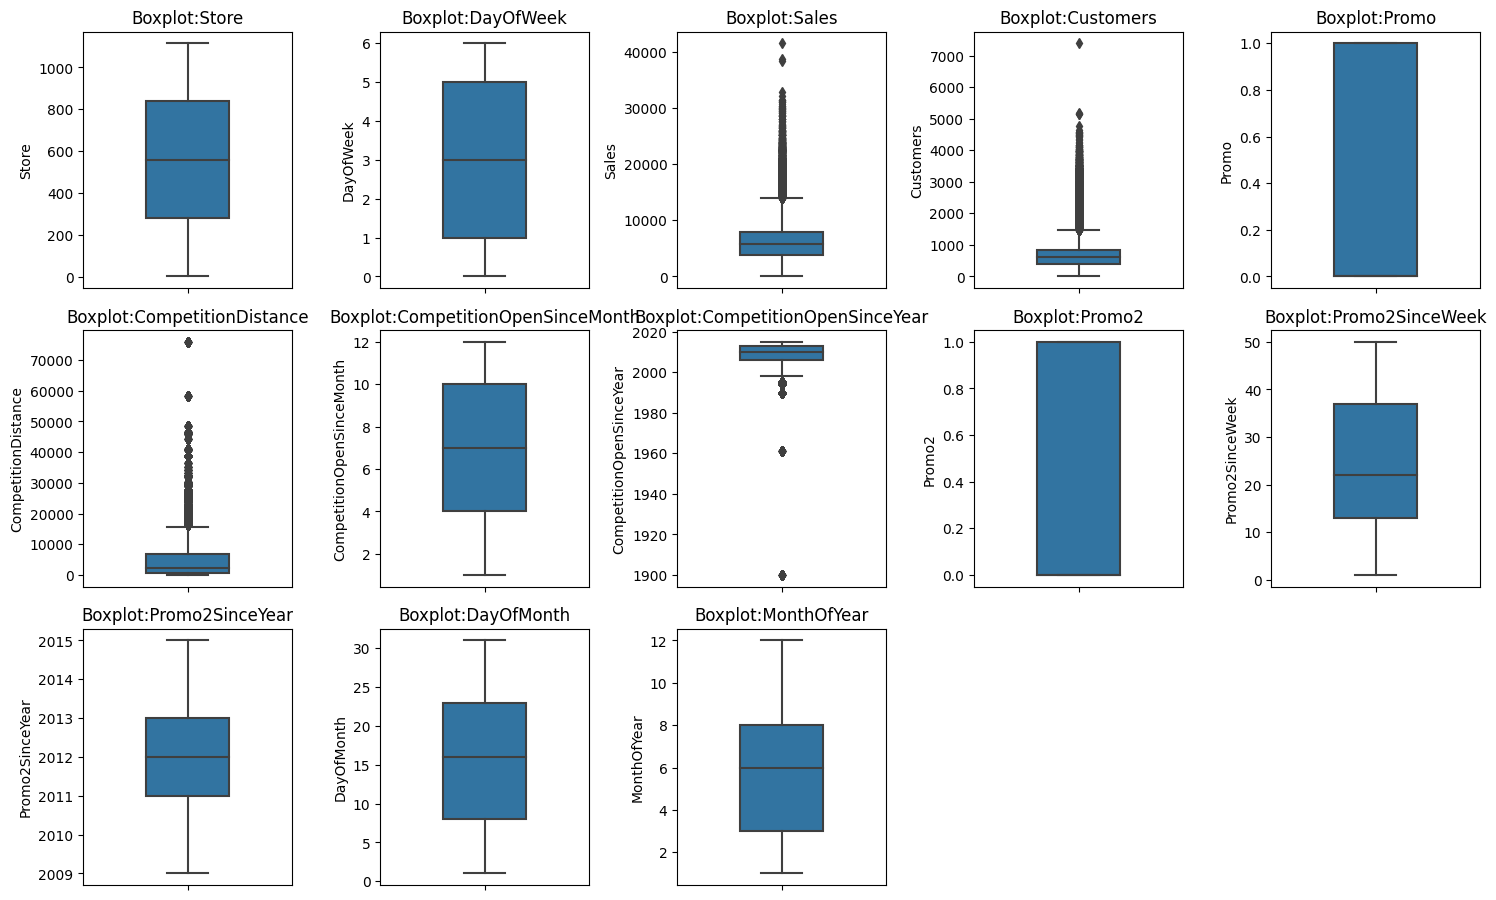

In [23]:
def plot_outliers_with_boxplot(df):
    # Select columns with numeric data types (float and integer)
    numeric_columns = df.select_dtypes(include=['number'])

    # Set up the figure and axis for subplots
    n_rows = (len(numeric_columns.columns) + 1) // 2
    fig, axes = plt.subplots(nrows=n_rows, ncols=5, figsize=(15, 3 * n_rows))
    axes = axes.flatten()  # Flatten axes to make it easier to iterate

    # Plot the boxplot for each numerical column
    for idx, column in enumerate(numeric_columns.columns):
        sns.boxplot(data=df, y=column, ax=axes[idx], width=0.4)
        axes[idx].set_title(f'Boxplot:{column}')

    # Remove empty subplots
    for idx in range(len(numeric_columns.columns), len(axes)):
        fig.delaxes(axes[idx])

    # Display the plot
    plt.tight_layout()
    plt.show()

# Plot the boxplots to show outliers in numerical features
plot_outliers_with_boxplot(combined_data)

##### Result:
- `['Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceYear']` appear have outliers
- `['CompetitionDistance']` can outliers can be handled through binining
- `['CompetitionOpenSinceYear']` is in the normal range, since stores could have been opened in the early 1900s


### Check if the target distribution

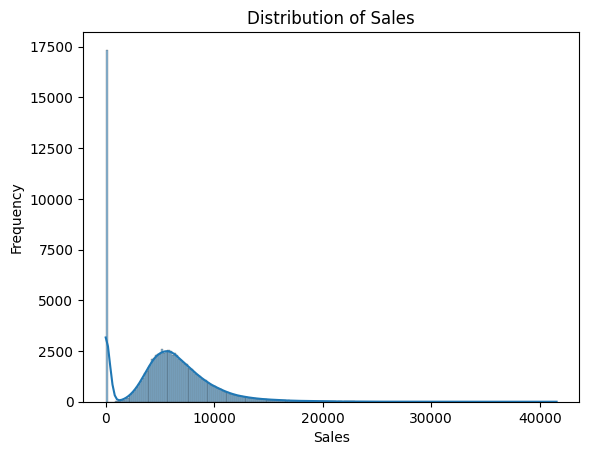

In [24]:
def plot_label_distribution(label_data):
    sns.histplot(label_data, kde=True)
    plt.title('Distribution of Sales')
    plt.xlabel('Sales')
    plt.ylabel('Frequency')
    plt.show()

# Call the function with  target label data
plot_label_distribution(combined_data['Sales'])


##### Result:
- Sales has a normal distribution. Although there is a large number of 0 entries, probably due to when the store was closed. This will be handled when evaluating the outliers

### Review the effect of sales promotion on sales

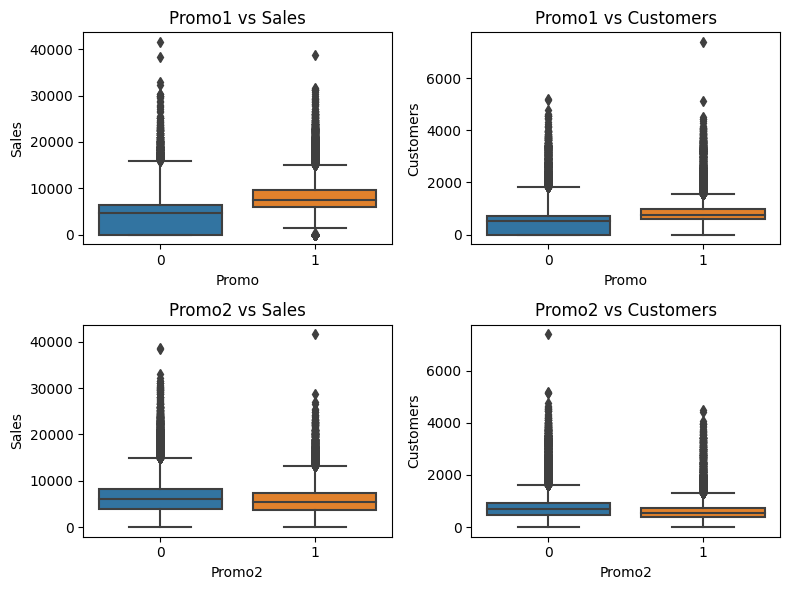

In [25]:
def plot_promos_effect(dataframe, promo1_col='Promo', promo2_col='Promo2', sales_col='Sales', customers_col='Customers'):
    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(8, 6))

    # Promo1 vs Sales
    sns.boxplot(x=promo1_col, y=sales_col, data=dataframe, ax=axs[0, 0])
    axs[0, 0].set_title('Promo1 vs Sales')

    # Promo1 vs Customers
    sns.boxplot(x=promo1_col, y=customers_col, data=dataframe, ax=axs[0, 1])
    axs[0, 1].set_title('Promo1 vs Customers')

    # Promo2 vs Sales
    sns.boxplot(x=promo2_col, y=sales_col, data=dataframe, ax=axs[1, 0])
    axs[1, 0].set_title('Promo2 vs Sales')

    # Promo2 vs Customers
    sns.boxplot(x=promo2_col, y=customers_col, data=dataframe, ax=axs[1, 1])
    axs[1, 1].set_title('Promo2 vs Customers')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function with  DataFrame
plot_promos_effect(combined_data)

##### Result:  

- `Promo1` was more successful than `Promo2` in driving customers and sales. `Promo2` seems to have had a slight negative effect on customers and sales

### Review the effect of store type on sales

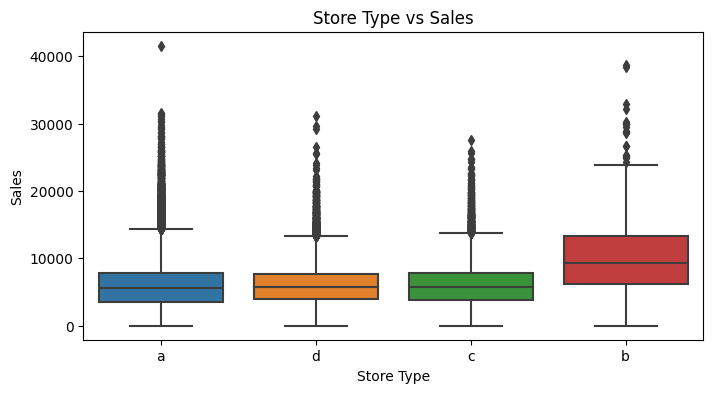

In [26]:
def plot_storetype_sales(dataframe, storetype_col='StoreType', sales_col='Sales'):
    # Create a boxplot of Sales vs StoreType
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=storetype_col, y=sales_col, data=dataframe)

    # Set title and labels
    plt.title('Store Type vs Sales')
    plt.xlabel('Store Type')
    plt.ylabel('Sales')

    # Display the plot
    plt.show()

# Call the function with  DataFrame
plot_storetype_sales(combined_data)

##### Result:
- Store type `b` outperformed all other stores in sales

### Review the which stores ran promotions and their effect on sales

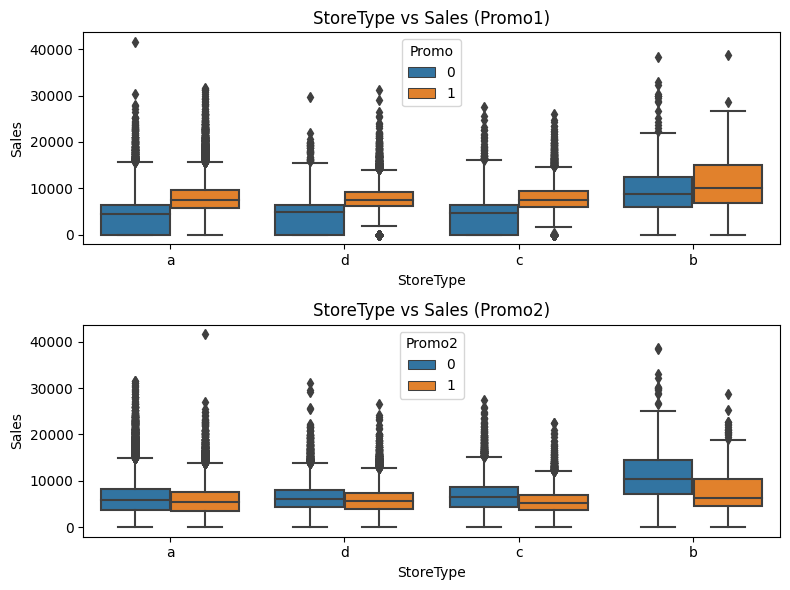

In [27]:
def plot_storetype_promos(dataframe, storetype_col='StoreType',
                                              promo1_col='Promo', promo2_col='Promo2',
                                              sales_col='Sales'):


    # Create subplots
    fig, axs = plt.subplots(2, figsize=(8, 6))

    # StoreType vs Sales with hue as Promo
    sns.boxplot(x=storetype_col, y=sales_col, hue=promo1_col, data=dataframe, ax=axs[0])
    axs[0].set_title('StoreType vs Sales (Promo1)')

    # StoreType vs Sales with hue as Promo2
    sns.boxplot(x=storetype_col, y=sales_col, hue=promo2_col, data=dataframe, ax=axs[1])
    axs[1].set_title('StoreType vs Sales (Promo2)')


    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function with  DataFrame
plot_storetype_promos(combined_data)

##### Result:
- Store type b ran more `promo` and fewer `promo2`s. It also showed a higher number of sales

### Review the relationship between store type and distance from competition

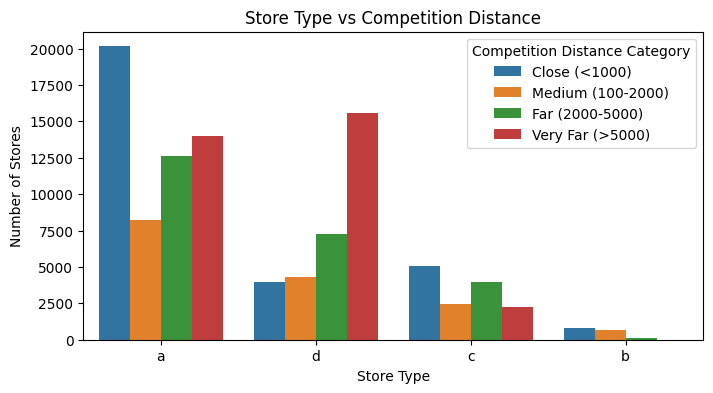

In [28]:
def plot_storetype_competition(dataframe, storetype_col='StoreType', competition_distance_col='CompetitionDistance'):
    # Define bins edges
    bins = [0, 1000, 2000, 5000, np.inf]
    # Define bins labels
    labels = ['Close (<1000)', 'Medium (100-2000)', 'Far (2000-5000)', 'Very Far (>5000)']


    # Create a new column 'CompetitionDistanceCategory' by binning 'CompetitionDistance' column
    dataframe['CompetitionDistanceCategory'] = pd.cut(dataframe[competition_distance_col], bins, labels=labels)

    # Create a bar plot of StoreType vs CompetitionDistanceCategory
    plt.figure(figsize=(8, 4))
    sns.countplot(x=storetype_col, hue='CompetitionDistanceCategory', data=dataframe)

    # Set title and labels
    plt.title('Store Type vs Competition Distance')
    plt.xlabel('Store Type')
    plt.ylabel('Number of Stores')
    plt.legend(title='Competition Distance Category')

    # Display the plot
    plt.show()

# Call the function with  DataFrame
plot_storetype_competition(combined_data)

##### Result:
- Store type `b` is located close to the competition with majority of the stores less than 2000 meters of their competition, most likely where there is a high volume of foot traffic

### Review the relationship between sales and distance from competition

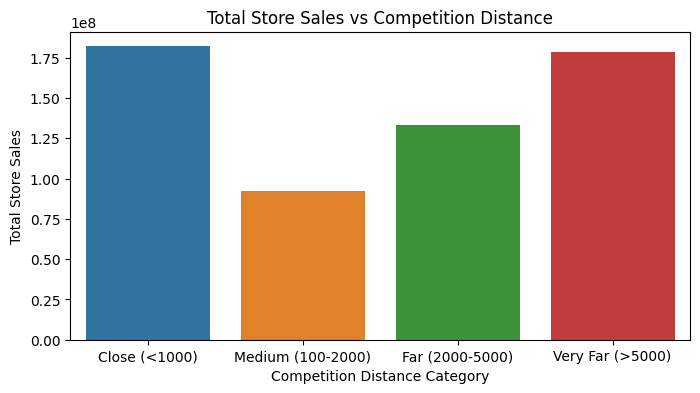

In [29]:
def plot_sales_competition(dataframe, sales_col='Sales', competition_distance_col='CompetitionDistance'):
    # Define bins edges
    bins = [0, 1000, 2000, 5000, np.inf]
    # Define bins labels
    labels = ['Close (<1000)', 'Medium (100-2000)', 'Far (2000-5000)', 'Very Far (>5000)']

    # Create a new column 'CompetitionDistanceCategory' by binning 'CompetitionDistance' column
    dataframe['CompetitionDistanceCategory'] = pd.cut(dataframe[competition_distance_col], bins, labels=labels)

    # Group by 'CompetitionDistanceCategory' and calculate total sales
    group_df = dataframe.groupby('CompetitionDistanceCategory')[sales_col].sum().reset_index()

    # Create a bar plot of Total Sales vs CompetitionDistanceCategory
    plt.figure(figsize=(8, 4))
    sns.barplot(x='CompetitionDistanceCategory', y=sales_col, data=group_df)

    # Set title and labels
    plt.title('Total Store Sales vs Competition Distance')
    plt.xlabel('Competition Distance Category')
    plt.ylabel('Total Store Sales')

    # Display the plot
    plt.show()

# Call the function with  DataFrame
plot_sales_competition(combined_data)

##### Result:
- Distance to a competitive store does affect the total sales, with stores either `close` > 1000 m or `very far` from competition < 5000m doing much better in sales

In [30]:
combined_data.drop(['CompetitionDistanceCategory'], axis=1, inplace=True)

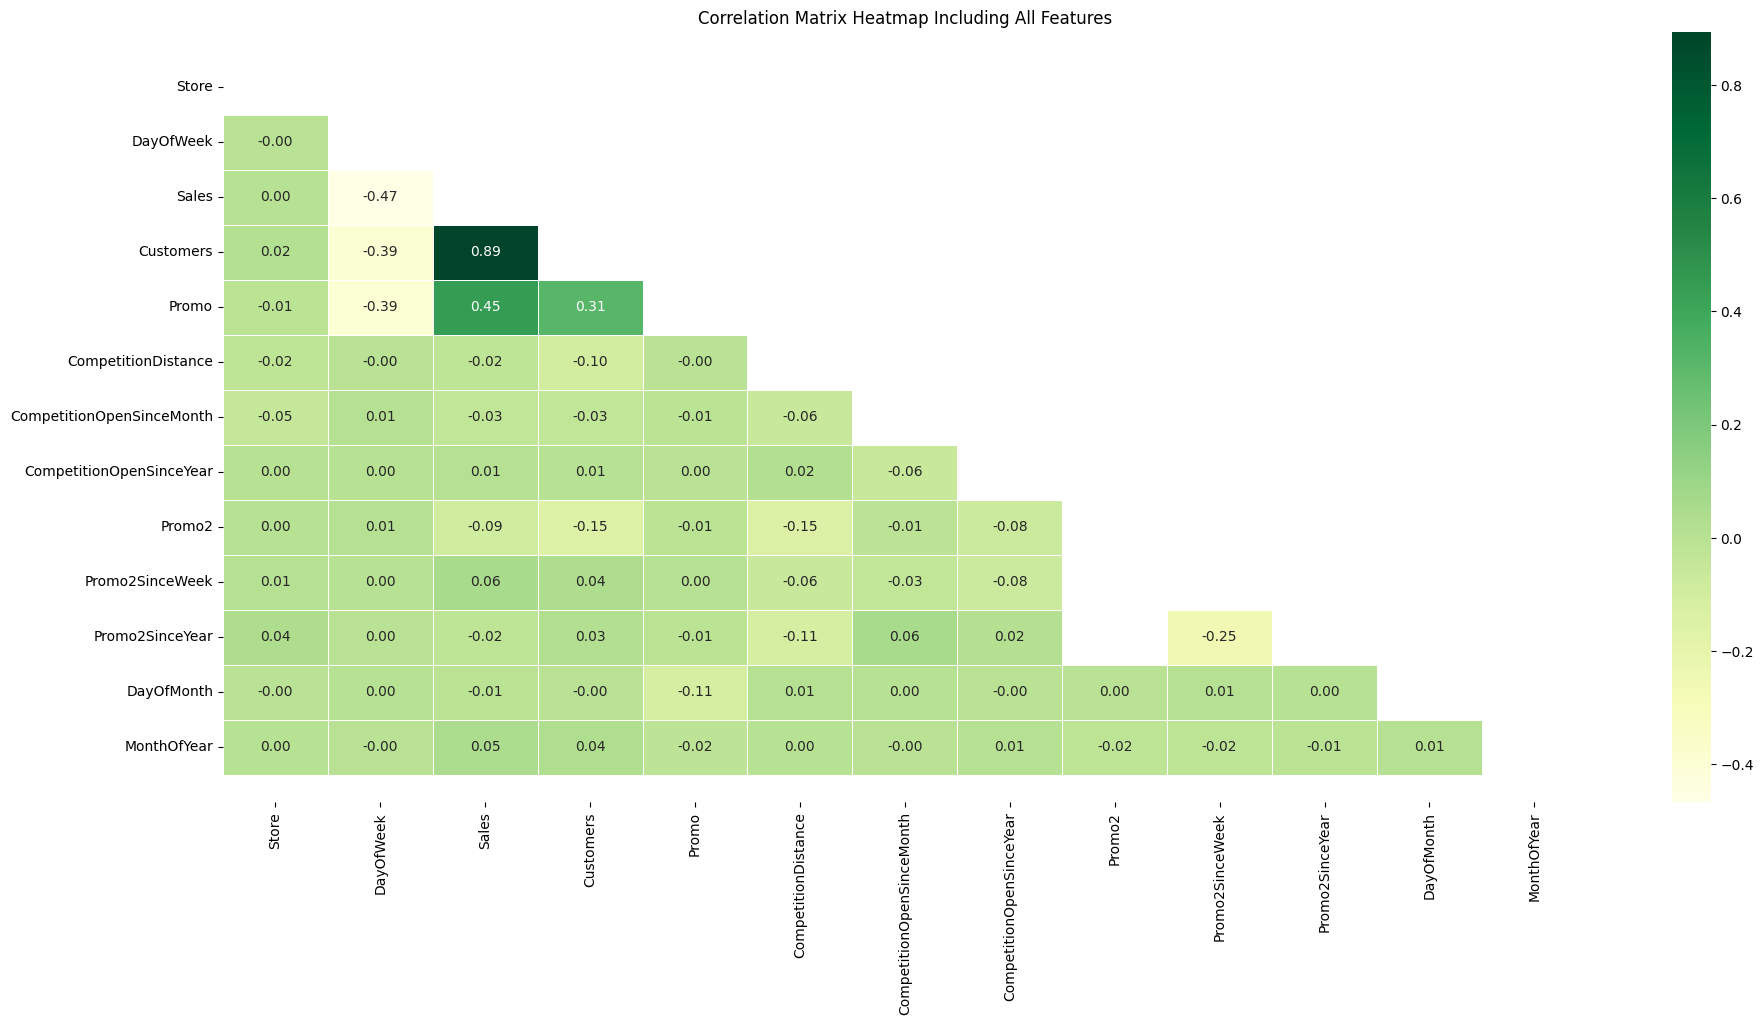

In [31]:
#@title Correlation Heatmap After Merge
corr_matrix = combined_data.corr(numeric_only=True)

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(corr_matrix)] = True

# Correlation Matrix Heatmap including all features
fig, ax = plt.subplots(figsize=(22,10))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGn")
#ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title("Correlation Matrix Heatmap Including All Features")

# save heatmap as .png file
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

##### Result: 
- As expected, there is a strong corelation between Customers and Sales (0.89)
- There is a signficant positive correlation between Promo and Sales (0.45) and Customer (0.31)
- Supprisingly, there is a negative corelation between Promo2 and Sales (-0.05) and Customer (-0.01)
- All other features have weak correlation 

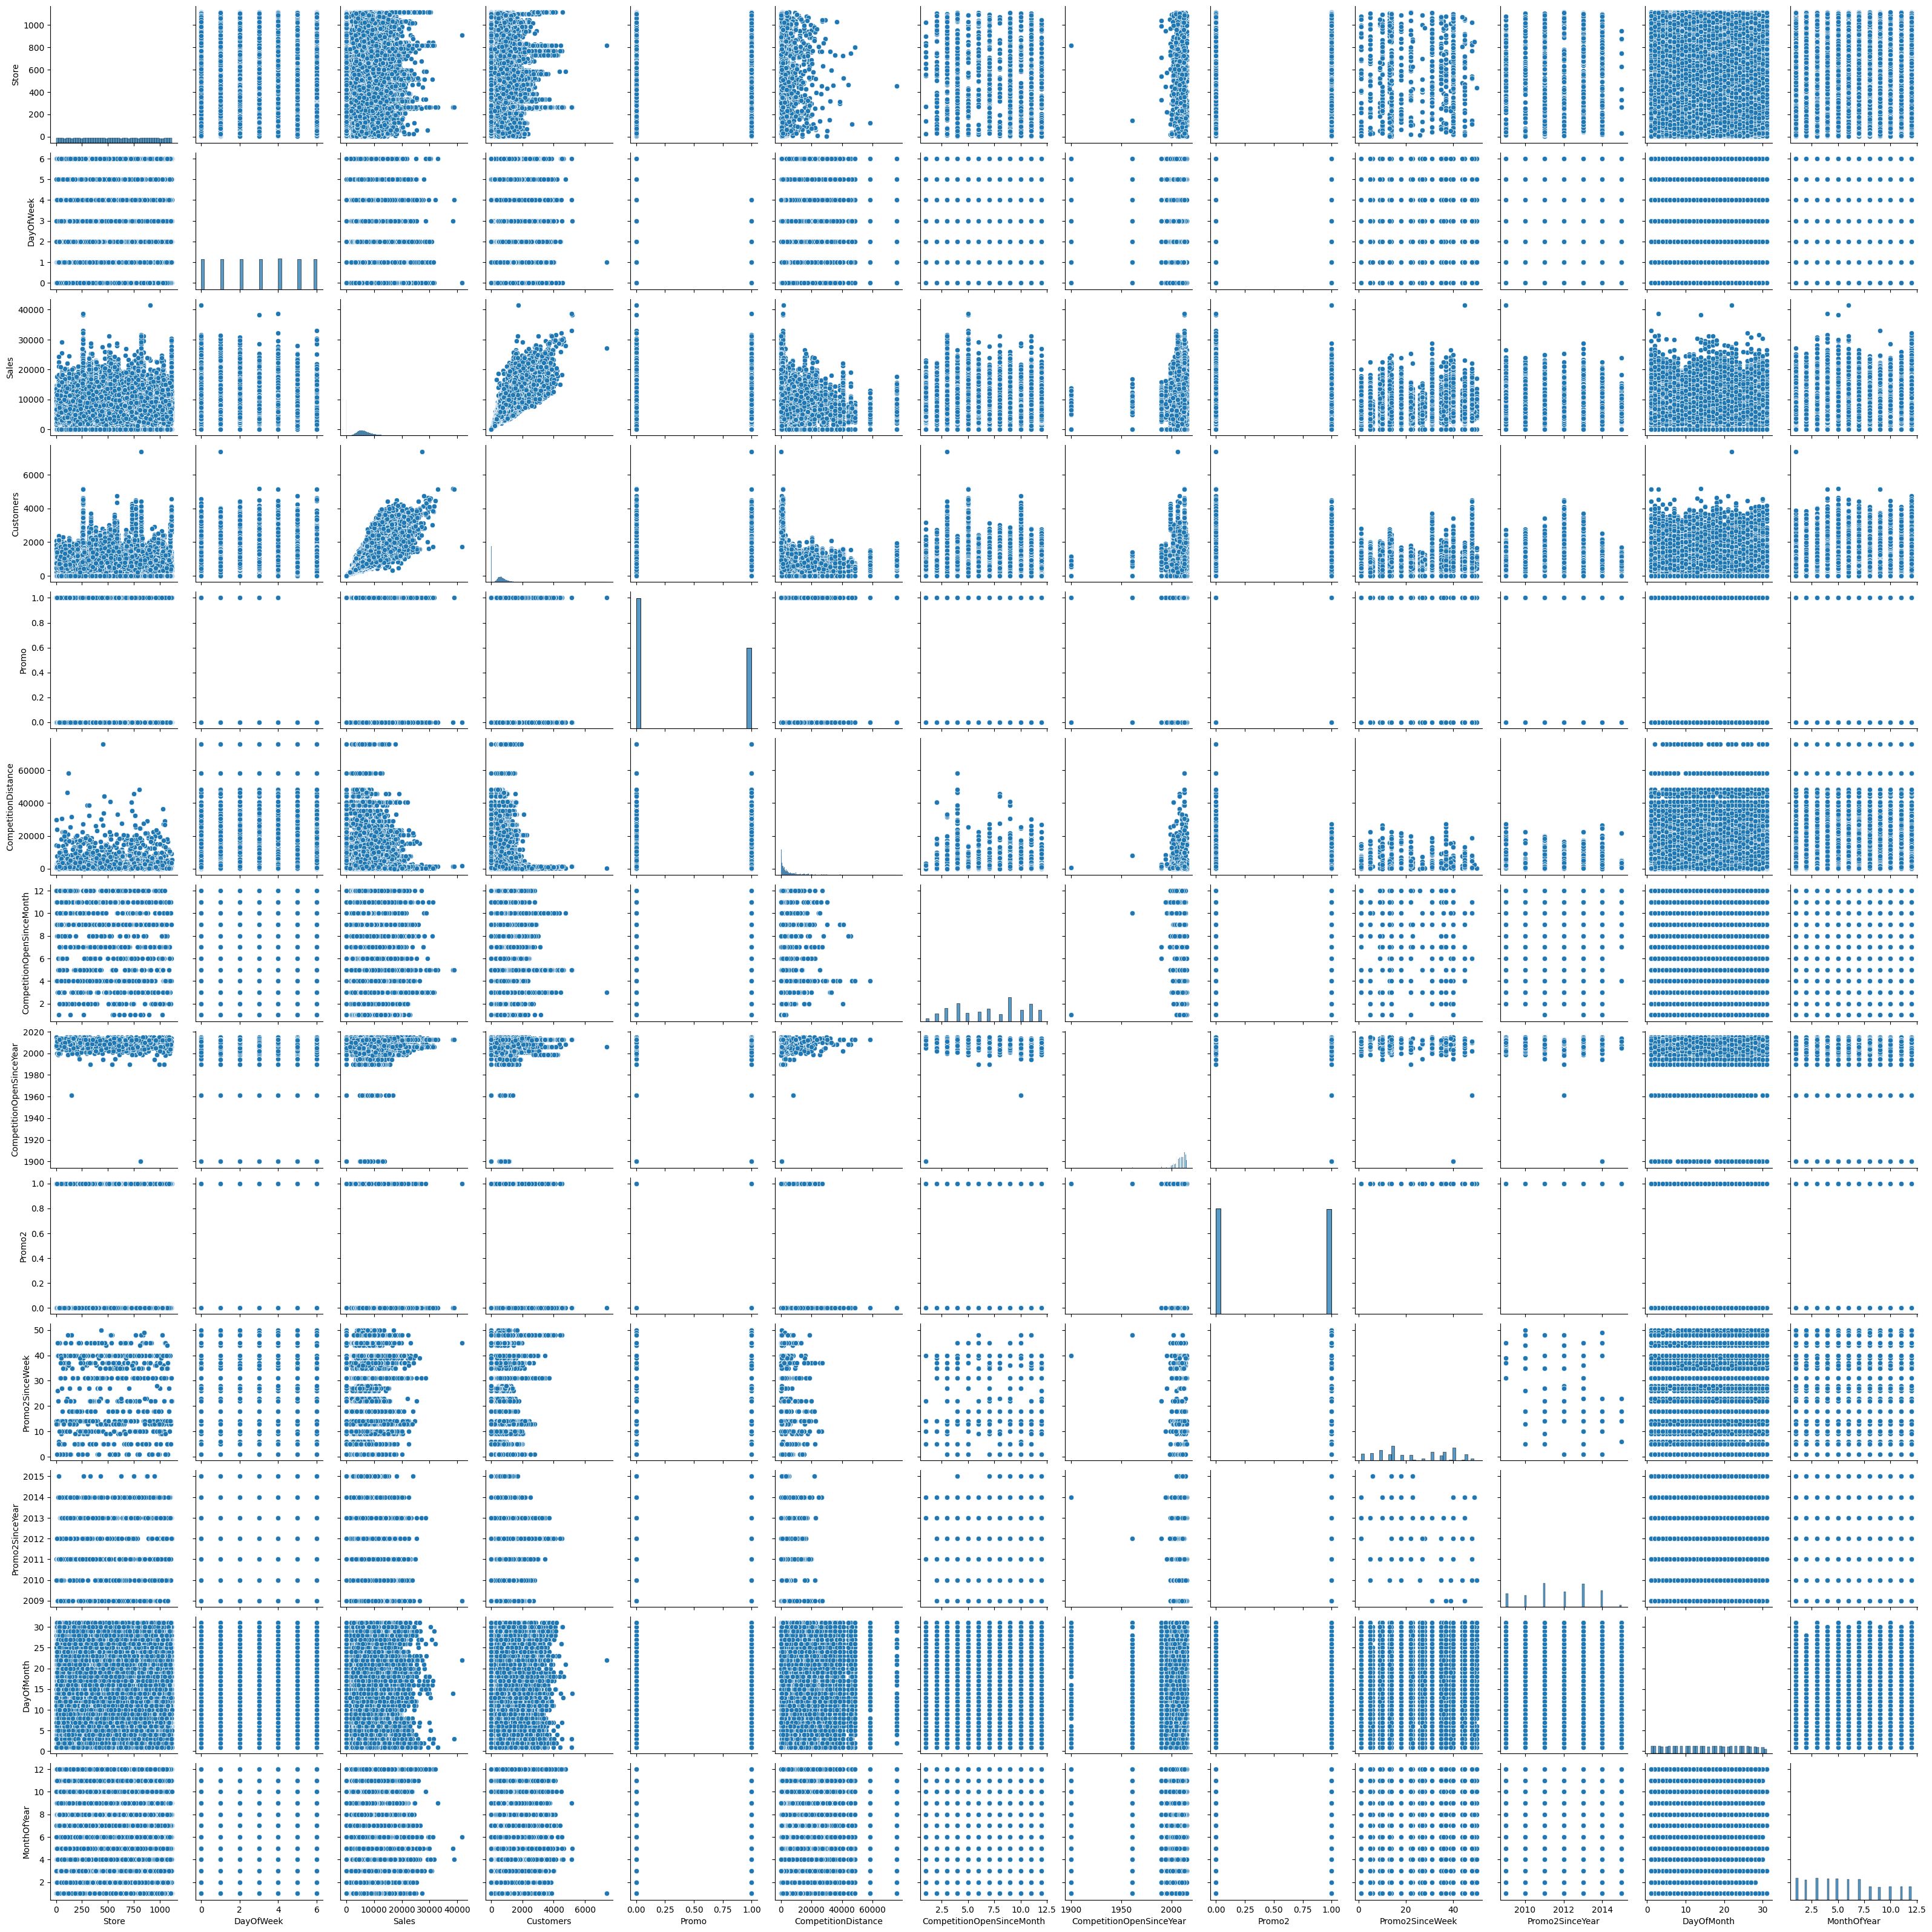

In [32]:
#@title Pairplot of Combined Data
sns.pairplot(combined_data)
plt.show()

# Feature Engineering

Feature engineering is an essential step in the machine learning process, where raw data is transformed into useful features that can improve the performance of a model. Below is a list feature engineering techniques that we explored

##### Handling missing values:
- Impute missing values using mean, median, or mode.
- Use interpolation methods for time-series data.
- Drop rows or columns with missing values.

##### Encoding categorical variables:
- One-hot encoding.
- Label encoding.
- Ordinal encoding.
- Target-based encoding.

##### Handling numerical features:
- Scaling: Min-Max scaling
- Binning: Discretize continuous features into bins.
- Polynomial features: Generate new features by combining existing features through mathematical operations (e.g., addition, multiplication, exponentiation).

##### Handling date and time features:
- Extract components such as year, month, day, day of the week, and time of the day.
- Create cyclical features to capture patterns in time-series data.

##### Feature selection:
- Filter methods: Select features based on correlation, mutual information, or variance.
- Embedded methods: Utilize models with built-in feature selection, such as LASSO, Ridge Regression, or Random Forests.

##### Feature interactions:
- Identify and create new features based on interactions between existing features that can improve model performance.

In [33]:
## Covert `SchoolHoliday` and `Open` binary to int dtype
combined_data['SchoolHoliday'] = combined_data['SchoolHoliday'].astype('int64')
combined_data['Open'] = combined_data['Open'].astype('int64')

## Handling missing values

From [Section 4.1.3 Check for Missing values](#Check-for-Missing-values)

`['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval']`

have missing values

### Missing values `['Promo2SinceWeek','Promo2SinceYear','PromoInterval']`

In [34]:
print(combined_data[['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval']].isna().sum())

CompetitionDistance            263
CompetitionOpenSinceMonth    32336
CompetitionOpenSinceYear     32336
Promo2SinceWeek              51105
Promo2SinceYear              51105
PromoInterval                51105
dtype: int64


Stores not running `promo2` corelate with values `Promo2SinceWeek`, `Promo2SinceYear` and `PromoInterval`

In [35]:
combined_data[combined_data['Promo2'] == 0].shape[0]

51105

Treat NaN for `PromoInterval` with new value Unknown,  `Promo2SinceYear` and `Promo2SinceWeek` with todays year ad week respectively

In [36]:
# Replace NaN values with 0 in the specified columns
combined_data['Promo2SinceWeek'] = combined_data['Promo2SinceWeek'].fillna(dt.datetime.now().isocalendar()[1])
combined_data['Promo2SinceYear'] = combined_data['Promo2SinceYear'].fillna(dt.datetime.now().year)
combined_data['PromoInterval'] = combined_data['PromoInterval'].fillna("PromoUnknown")

# Define a dictionary to map the old values to the new ones
replace_dict = {'Jan,Apr,Jul,Oct': 'PromoInterval1',
                'Feb,May,Aug,Nov': 'PromoInterval2',
                'Mar,Jun,Sept,Dec': 'PromoInterval3'}

# Use the replace function to change the values
combined_data['PromoInterval'] = combined_data['PromoInterval'].replace(replace_dict)


Check for missing values

In [37]:
print(combined_data[['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval']].isna().sum())

CompetitionDistance            263
CompetitionOpenSinceMonth    32336
CompetitionOpenSinceYear     32336
Promo2SinceWeek                  0
Promo2SinceYear                  0
PromoInterval                    0
dtype: int64


### Missing values `['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']`

**CompetitionDistance** has a very strong [corellation with sales](#Review-the-relationship-between-store-type-and-distance-from-competition) and we treat CompetitionDistance missing values by replacing them with the mean for each store type

In [38]:
storeTypeA = combined_data.loc[(combined_data['StoreType'] == 'a'), 'CompetitionDistance'].mean()
storeTypeB = combined_data.loc[(combined_data['StoreType'] == 'b'), 'CompetitionDistance'].mean()
storeTypeC = combined_data.loc[(combined_data['StoreType'] == 'c'), 'CompetitionDistance'].mean()
storeTypeD = combined_data.loc[(combined_data['StoreType'] == 'd'), 'CompetitionDistance'].mean()


combined_data.loc[combined_data['StoreType'] == 'a'] = combined_data.loc[combined_data['StoreType'] == 'a'].fillna(value={"CompetitionDistance" : storeTypeA})
combined_data.loc[combined_data['StoreType'] == 'b'] = combined_data.loc[combined_data['StoreType'] == 'b'].fillna(value={"CompetitionDistance" : storeTypeB})
combined_data.loc[combined_data['StoreType'] == 'c'] = combined_data.loc[combined_data['StoreType'] == 'c'].fillna(value={"CompetitionDistance" : storeTypeC})
combined_data.loc[combined_data['StoreType'] == 'd'] = combined_data.loc[combined_data['StoreType'] == 'd'].fillna(value={"CompetitionDistance" : storeTypeD})

**CompetitionOpenSinceMonth** and **CompetitionOpenSinceYear** are treated by replacing NaNs with current Month and year respectively

In [39]:
combined_data['CompetitionOpenSinceMonth'] = combined_data['CompetitionOpenSinceMonth'].fillna(dt.datetime.now().month)
combined_data['CompetitionOpenSinceYear'] = combined_data['Promo2SinceWeek'].fillna(dt.datetime.now().year)

Check for missing values

In [40]:
print(combined_data[['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval']].isna().sum())

CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


## Outliers

From [Section 4.3.4 Find Outliers in Numerical Variables](#Find-Outliers-in-numerical-features)

`['Sales', 'Customers', 'CompetitionDistance']` have outliers.

**CompetitionDistance** outliers will be handled through bining

### `['Sales', 'Customers',]` outliers

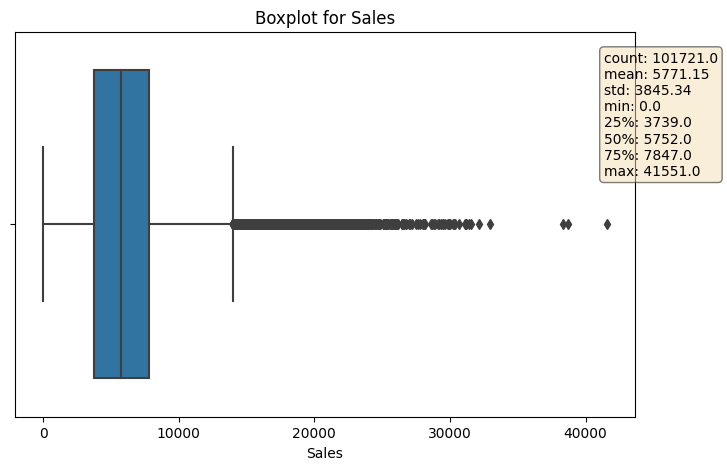

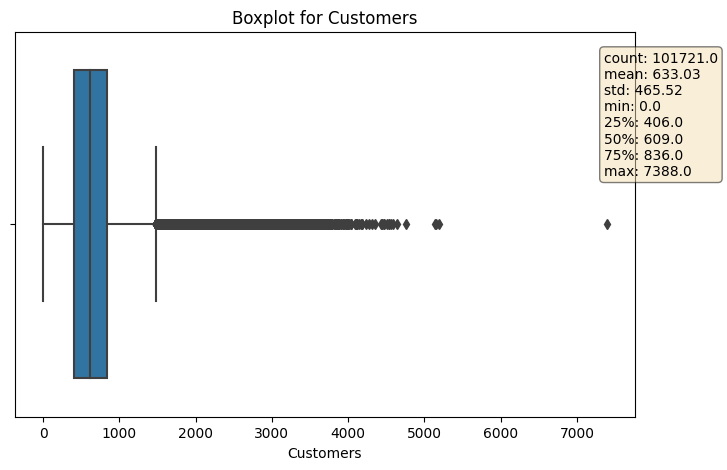

In [41]:
def draw_boxplot(data, columns):
    for column in columns:
        plt.figure(figsize=(8,5))

        # Create boxplot
        box_plot = sns.boxplot(x=data[column])

        # Get statistics
        stats = data[column].describe().round(2)

        # Add statistics to the plot
        textstr = '\n'.join([f'{key}: {val}' for key, val in stats.items()])
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        box_plot.text(0.95, 0.95, textstr, transform=box_plot.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

        # Set plot title
        plt.title(f'Boxplot for {column}')
        plt.show()

draw_boxplot(combined_data, ['Sales', 'Customers'])

##### Result:
- There are no stores with customers or sales below 0
- Replace the values above the upper 1.5xIQR with the upper outlier value

In [42]:
def calculate_upper_outlier_value(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1

    upper_outlier_value = Q3 + 1.5 * IQR

    return upper_outlier_value


upper_sales_outlier_value = calculate_upper_outlier_value(combined_data, 'Sales')
upper_customers_outlier_value = calculate_upper_outlier_value(combined_data, 'Customers')

print("Upper Outlier Value for Sales: ", upper_sales_outlier_value)
print("Upper Outlier Value for Customers: ", upper_customers_outlier_value)

Upper Outlier Value for Sales:  14009.0
Upper Outlier Value for Customers:  1481.0


In [43]:
def replace_upper_outliers(dataframe, column):
    upper_outlier_value = calculate_upper_outlier_value(dataframe, column)
    dataframe[column] = dataframe[column].apply(lambda x: upper_outlier_value if x > upper_outlier_value else x)
    return dataframe

combined_data = replace_upper_outliers(combined_data, 'Sales')
combined_data = replace_upper_outliers(combined_data, 'Customers')

Check for outliers

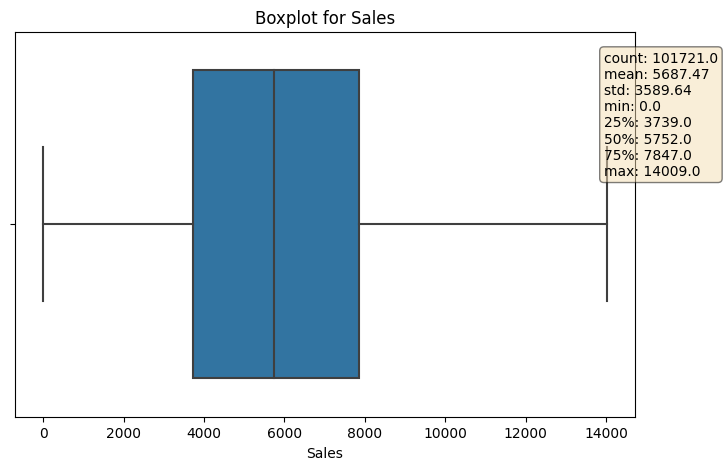

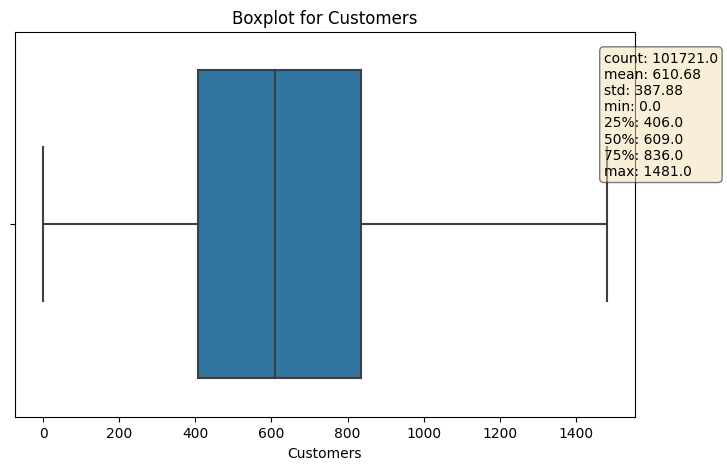

In [44]:
draw_boxplot(combined_data, ['Sales', 'Customers'])

### Drop the rows when the stores are closed then drop the `open` column

Calculate the total sales for the stores that were closed `Open=0`

In [45]:
def sum_sales_closed_stores(data):
    closed_stores = data[data['Open'] == 0]
    total_sales = closed_stores['Sales'].sum()
    return total_sales

# Use the function
total_sales_closed = sum_sales_closed_stores(combined_data)
print(f'Total sales for stores that were closed is {total_sales_closed}.')

Total sales for stores that were closed is 0.0.


Drop the Rows of Date where Stores where closed

In [46]:
def drop_closed_stores(data):
    # Select only the rows where 'Open' is not equal to 0
    open_stores = data[data['Open'] != 0]
    return open_stores

# Use the function
combined_data = drop_closed_stores(combined_data)

In [47]:
combined_data['Open'].value_counts()

1    84377
Name: Open, dtype: int64

In [48]:
combined_data.drop(columns=["Open"], inplace=True)

## Encoding

### Binning of the CompetitionDistance

In [49]:
def bin_competition_distance(dataframe):
    # Define the bins and labels
    bins = [0, 1000, 2000, 5000, np.inf]
    labels = ['Close', 'Medium', 'Far', 'Very Far']

    # Create a new column with the binned distances
    dataframe['CompetitionDistance'] = pd.cut(dataframe['CompetitionDistance'], bins=bins, labels=labels)

    return dataframe

# Apply the function to  DataFrame
combined_data = bin_competition_distance(combined_data)

In [50]:
combined_data.CompetitionDistance

923026         Far
731180       Close
790350    Very Far
252134    Very Far
666826      Medium
            ...   
270985       Close
135808       Close
537730       Close
423639    Very Far
256043      Medium
Name: CompetitionDistance, Length: 84377, dtype: category
Categories (4, object): ['Close' < 'Medium' < 'Far' < 'Very Far']

### One hot encoding - categorical Features

This is a method of turning categorical data into binary (0 or 1) sequences to ensure the machine learning model doesn't attribute an order to the categories where none exists. This method is useful when the categorical variable is nominal (i.e., when there is no order or priority in the categories). We use One Hot encoding to encode the [nominal categorical features identified in section 4.2.1](#List-the-Categorical-features)

In [51]:
print_categorical_values(combined_data)

Categorical Column: StateHoliday
Unique Values: ['0' 'a' 'b' 'c']

Categorical Column: StoreType
Unique Values: ['a' 'd' 'c' 'b']

Categorical Column: Assortment
Unique Values: ['a' 'c' 'b']

Categorical Column: CompetitionDistance
Unique Values: ['Far', 'Close', 'Very Far', 'Medium']
Categories (4, object): ['Close' < 'Medium' < 'Far' < 'Very Far']

Categorical Column: PromoInterval
Unique Values: ['PromoUnknown' 'PromoInterval3' 'PromoInterval1' 'PromoInterval2']



In [52]:
# fucntion to One Hot Encoding
def encode(data, col):
    return pd.concat([data, pd.get_dummies(col, prefix=col.name)], axis=1)

# One Hot encoding of 3 variable
combined_data = encode(combined_data, combined_data.StateHoliday)
combined_data = encode(combined_data, combined_data.StoreType)
combined_data = encode(combined_data, combined_data.Assortment)
combined_data = encode(combined_data, combined_data.PromoInterval)
combined_data = encode(combined_data, combined_data.CompetitionDistance)

# Drop tranfromed features
combined_data.drop(['StateHoliday', 'StoreType', 'Assortment','PromoInterval','CompetitionDistance'], axis=1, inplace=True)

In [53]:
combined_data.tail(5)

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,...,Assortment_b,Assortment_c,PromoInterval_PromoInterval1,PromoInterval_PromoInterval2,PromoInterval_PromoInterval3,PromoInterval_PromoUnknown,CompetitionDistance_Close,CompetitionDistance_Medium,CompetitionDistance_Far,CompetitionDistance_Very Far
270985,11,0,2014-11-24,11548.0,1407.0,1,0,11.0,1.0,1,...,0,1,1,0,0,0,1,0,0,0
135808,894,2,2015-04-01,13701.0,1481.0,1,1,11.0,26.0,0,...,0,0,0,0,0,1,1,0,0,0
537730,1086,4,2014-03-07,8226.0,918.0,1,0,11.0,18.0,1,...,0,0,0,1,0,0,1,0,0,0
423639,725,1,2014-06-17,5857.0,587.0,1,0,6.0,26.0,0,...,0,1,0,0,0,1,0,0,0,1
256043,33,2,2014-12-10,7310.0,718.0,0,0,5.0,26.0,0,...,0,1,0,0,0,1,0,1,0,0


### Cyclic encoding - for dateTypes

Cyclic encoding is a method used to encode cyclic features like hour of the day, day of the week, month of the year, etc., in machine learning models. These are features where the highest value is just before the lowest value and they wrap around, which is a type of relationship that linear regression algorithms can't handle natively.

In [54]:
def print_date_columns(dataframe):
    date_columns = [col for col in dataframe.columns if dataframe[col].dtype == 'datetime64[ns]']
    return date_columns

# Usage
date_columns = print_date_columns(combined_data)
print("Date Columns: ", date_columns)

Date Columns:  ['Date']


Print the date columns `DayOfWeek`, `DayOfMonth`, `MonthOfYear` were created in [Section 4.3.2 Explore the relationship between DayOfWeek, DayOfMonth and MonthOfYear to sales](#Explore-the-relationship-between-DayOfWeek,-DayOfMonth-and-MonthOfYear-to-sales) from `Date` column

In [55]:
print(combined_data[['DayOfWeek', 'DayOfMonth', 'MonthOfYear']].head())

        DayOfWeek  DayOfMonth  MonthOfYear
923026          1          26            3
731180          5          14            9
790350          1          23            7
252134          0          15           12
666826          0          11           11


In [56]:
def cyclic_encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col] / max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col] / max_val)
    return data

# Applying cyclic encoding
combined_data = cyclic_encode(combined_data, 'DayOfWeek', 7)
combined_data = cyclic_encode(combined_data, 'DayOfMonth', 4) # Assuming 4 weeks in a month
combined_data = cyclic_encode(combined_data, 'MonthOfYear', 12)

# Now drop the original columns
combined_data = combined_data.drop(['DayOfWeek', 'DayOfMonth', 'MonthOfYear'], axis=1)

### Drop Customers column

Drop the Customers column since that will not be available in the final prediction dataset

In [57]:
combined_data = combined_data.drop(['Date', 'Customers'], axis=1)

## Final Set of Features

In [58]:
combined_data.head(5)

,Store,Sales,Promo,SchoolHoliday,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StateHoliday_0,...,CompetitionDistance_Close,CompetitionDistance_Medium,CompetitionDistance_Far,CompetitionDistance_Very Far,DayOfWeek_sin,DayOfWeek_cos,DayOfMonth_sin,DayOfMonth_cos,MonthOfYear_sin,MonthOfYear_cos
923026,592,5548.0,1,1,6.0,26.0,0,26.0,2023.0,1,...,0,0,1,0,0.781831,0.623490,-1.960673e-15,-1.000000e+00,1.000000e+00,6.123234e-17
731180,526,7467.0,0,0,6.0,48.0,1,48.0,2011.0,1,...,1,0,0,0,-0.974928,-0.222521,8.572528e-16,-1.000000e+00,-1.000000e+00,-1.836970e-16
790350,601,3360.0,0,1,4.0,14.0,1,14.0,2011.0,1,...,0,0,0,1,0.781831,0.623490,-1.000000e+00,-3.184701e-15,-5.000000e-01,-8.660254e-01
252134,953,11414.0,1,0,4.0,22.0,1,22.0,2011.0,1,...,0,0,0,1,0.000000,1.000000,-1.000000e+00,-2.694842e-15,-2.449294e-16,1.000000e+00
666826,842,14009.0,0,0,11.0,26.0,0,26.0,2023.0,1,...,0,1,0,0,0.000000,1.000000,-1.000000e+00,-2.449913e-15,-5.000000e-01,8.660254e-01


## Split the dataset into training and test sets

In [59]:
X = combined_data.drop('Sales', axis=1)
y = combined_data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Modeling

### Scoring

When predicting a continuous variable, popular metrics include Mean Squared Error (MSE) and Root Mean Squared Error (RMSE), both sensitive to outliers and useful for penalizing large errors. Mean Absolute Error (MAE) is less sensitive to outliers, providing the average absolute difference between predicted and actual values. R-squared measures how well predictions explain the variance in output, perfect when it's 1. Mean Squared Logarithmic Error (MSLE) is more robust to scale and outliers, providing the average squared logarithmic difference. We chose to use MAE to account for outliers in our dataset.       

We evaluated five baseline models and chose to use MAE to track model performance and account for outliers. Models evaluated

| Regression Model | Description | Pros | Cons |
|------------------|-------------|------|------|
| Linear Regression | Simplest form of regression that assumes a linear relationship between input and output variables. | Simple to understand and interpret, fast to train. | Assumes linear relationship, sensitive to outliers. |
| Ridge Regression | Ridge Regression (L2 regularization): This model is best to use when most of  features are relevant or when you have fewer features than data points. It tends to distribute the weights relatively evenly across all features and doesn't force coefficients to be zero, hence it includes all features in the model. | Reduces overfitting, handles multicollinearity, distributes weights relatively evenly. | Requires tuning of regularization parameters, includes all features which might not always be beneficial. |
| Lasso Regression | Lasso Regression (L1 regularization): This model is best to use when only a few features are likely to be important or you have more features than data points. It tends to create sparse solutions, with many coefficients being zero, effectively performing feature selection. | Reduces overfitting, performs feature selection by creating sparse solutions. | Requires tuning of regularization parameters, may omit some features that could be useful. |
| Elastic Net Regression | Elastic Net Regression: This model is a combination of Ridge and Lasso and is best to use when there is a mix of important and unimportant features, or when features are highly correlated. Elastic Net allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. | Balances between feature selection and distributing weights, handles multicollinearity, good when features are highly correlated. | Requires tuning of regularization parameters. |
| Decision Tree Regression | Uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). | Easy to interpret, handles non-linear relationships. | Can easily overfit or underfit the data. |
| Gradient Boosting (XGBoost) | Trains many models in a gradual, additive and sequential manner. The major difference between AdaBoost and Gradient Boosting Algorithm is how the two algorithms identify the shortcomings of weak learners. | Often provides predictive accuracy that can't be beat. | Less interpretable, can overfit if not careful, slower training time. |
| Random Forest Regression | An ensemble method that uses a multitude of decision trees during training and outputs the average prediction of the individual trees to reduce overfitting. | Good performance, handles non-linear relationships, less likely to overfit than a single decision tree. | Less interpretable than a single decision tree, slower training time. |
| Histogram Gradient Boosting | An optimized implementation of gradient boosting that bins continuous features into discrete bins and uses these bins to construct a histogram, which can speed up the computation and use less memory. | Fast training time, good performance with large datasets. | Less interpretable, may not perform well with smaller datasets. |


In [60]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

def train_and_evaluate(models, X_train, X_val, y_train, y_val):
    model_results = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        mae = mean_absolute_error(y_val, y_pred)
        model_results[model_name] = mae

    return model_results


# Define  models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "XGBoost": XGBRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Histogram Gradient Boost":HistGradientBoostingRegressor()
}

# Train and evaluate  models
results = train_and_evaluate(models, X_train, X_val, y_train, y_val)

# Print  results in a table
for model, mae in results.items():
    print(f"{model:<25} MAE: {mae:.2f}")

Linear Regression         MAE: 1880.54
Ridge Regression          MAE: 1880.53
Lasso Regression          MAE: 1880.86
Elastic Net Regression    MAE: 1994.90
Decision Tree Regression  MAE: 1075.94
XGBoost                   MAE: 854.21
Random Forest Regression  MAE: 826.91
Histogram Gradient Boost  MAE: 1265.35


### Interpreting the results

In [61]:
print(combined_data['Sales'].describe())

count    84377.000000
mean      6856.555851
std       2741.939637
min          0.000000
25%       4874.000000
50%       6370.000000
75%       8352.000000
max      14009.000000
Name: Sales, dtype: float64


The Mean Absolute Error (MAE) metric measures the average absolute difference between the predicted and actual values. A smaller MAE value indicates better predictive performance.

From the results, the Random Forest Regression model performs the best with the lowest MAE value of 822.58. This is significantly lower than the second best performing model, XGBoost, which has a MAE of 852.59. The Decision Tree Regression model also performs relatively well with a MAE of 1074.65, though it is higher than the Random Forest and XGBoost models. The linear models (Linear, Ridge, Lasso, Elastic Net) all have a much higher MAE value, around 1880-1995, indicating lower performance compared to the other models. The Histogram Gradient Boost model also has a higher MAE than the best performing models, at 1265.64.

Considering the descriptive statistics of the 'Sales' column, the mean sales amount is approximately 6857 with a standard deviation of 2742, indicating a moderate level of variability in the sales. The minimum value of sales is 0 and the maximum is 14009.

Given these observations, it is clear that the Random Forest Regression model is the most accurate in predicting sales values as it has the lowest MAE. It's particularly impressive since the MAE is considerably lower than the standard deviation of the actual sales values, indicating that the model is not just predicting the average sales every time but is accurately capturing the variability in sales. 

# Conclusion

The analysis of the dataset reveals several key insights that can guide strategic decisions.

- Open stores, unsurprisingly, accounted for 100% of sales, indicating the importance of operating hours in driving revenue. Furthermore, nearly all (96%) sales occurred on days without state holidays, presumably due to fewer store closures on these days.

- School holidays, despite only comprising 17% of the data, generated more than 50% of total sales, suggesting high profitability during these periods.

- There was uneven representation of store and assortment types, with type 'b' underrepresented at 2.8% and 1.6% respectively. However, both these types contributed to a majority of sales, indicating their higher profitability.

- Promotions played a key role in driving sales with 'Promo1' being more successful than 'Promo2'. Interestingly, 'Promo2' appeared to slightly decrease customer count and sales.

- Finally, a strong correlation between customer numbers and sales (0.89) reinforces the importance of customer acquisition and retention strategies in enhancing sales.

**Strategic Recommendations:**

Based on these insights, the following strategic decisions could potentially increase sales:

1. **Maximize Operating Hours and Days:** Given that all sales occurred when stores were open, optimizing operating hours could drive additional sales. Furthermore, considering the high sales volume during non-holiday days, efforts could be made to remain open on state holidays where legally permissible.

2. **Leverage School Holidays:** School holidays were found to be a high sales period. Hence, planning targeted promotions, activities, or sales events during these periods could attract more customers and increase sales.

3. **Prioritize Store Type 'B' and Assortment Type 'B':** Despite their underrepresentation, these types significantly contributed to sales. Thus, opening more 'B' type stores and increasing 'B' type assortments could boost sales.

4. **Reassess 'Promo2' Strategy:** 'Promo2' seemed to have a slightly negative impact on sales and customer count. It may be beneficial to reevaluate this promotional strategy or experiment with different promotional campaigns under 'Promo2'.

5. **Enhance Customer Experience:** Given the strong correlation between customer numbers and sales, strategies to improve customer service, enhance store ambiance, and provide a superior shopping experience could help increase customer numbers and, by extension, sales.
